### Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\rakhi\Downloads\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
col=df.columns
col

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Check for null values

In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values.

### Check for duplicates

In [9]:
df.duplicated().any()

False

There are no duplicate values.

###  Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in np.arange(len(col)):
    df[col[i]]= le.fit_transform(df[col[i]])

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


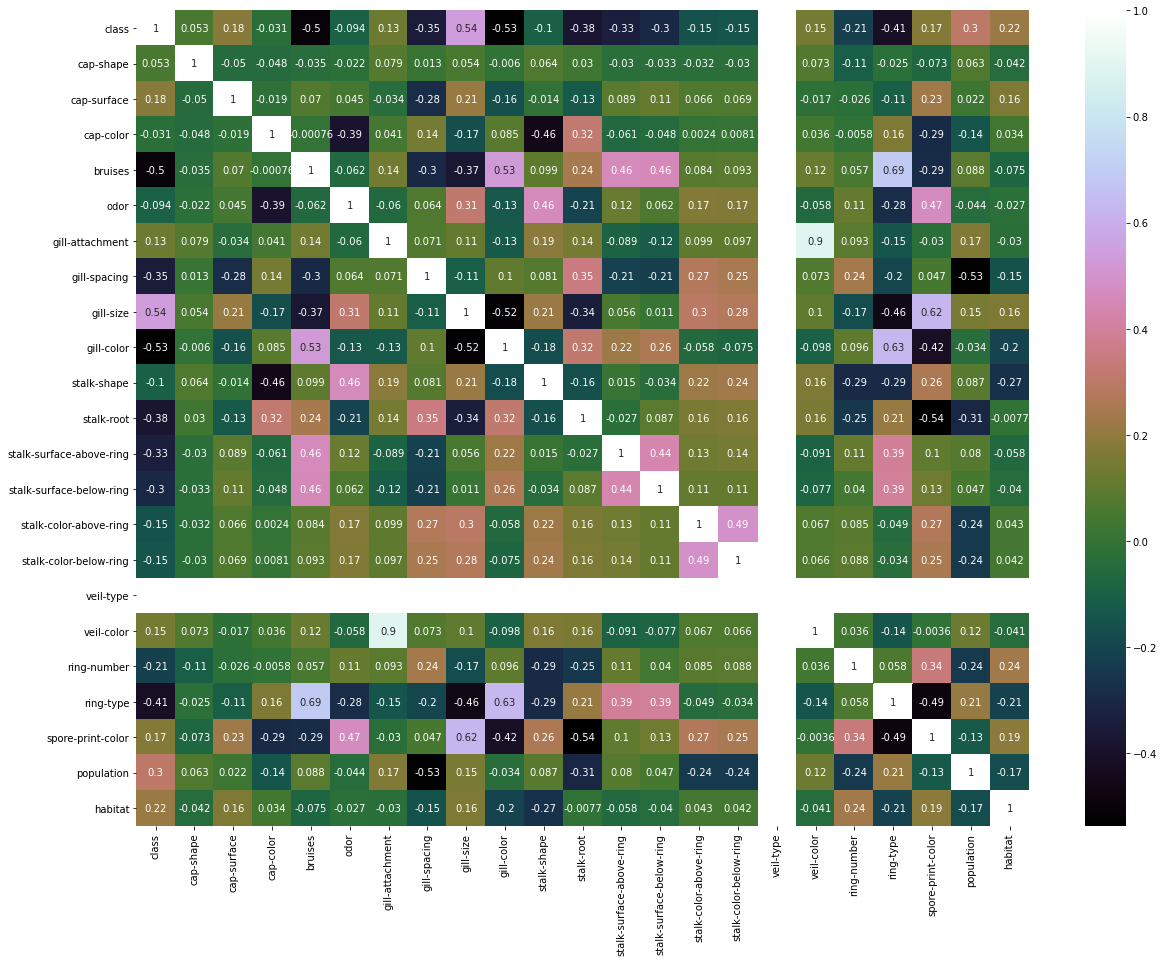

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True,cmap="cubehelix")
plt.show()

1. gill attachment and veil colour is highly positively correlated.

2. We cannot see any statistical data or any correlation in the "veil-type" column. This is because this attribute has a single value for all records. We will drop this column from dataset.

### EDA

<AxesSubplot:ylabel='class'>

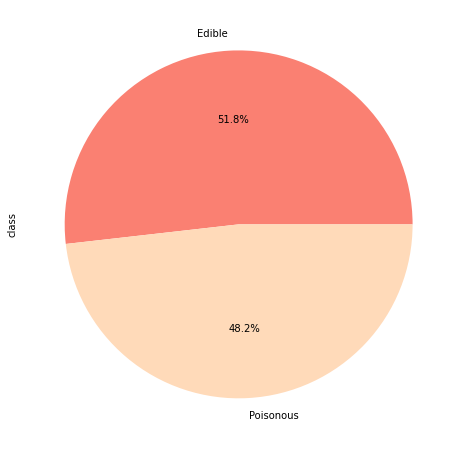

In [13]:
labels = ['Edible', 'Poisonous']
colors = ['salmon', 'peachpuff']
df["class"].value_counts().plot(kind="pie",labels=labels,colors=colors,autopct='%.1f%%',figsize=(8,8))

1. The dataset is balanced.
2. Edible mushrooms are more than poisonous mushrooms in data set.

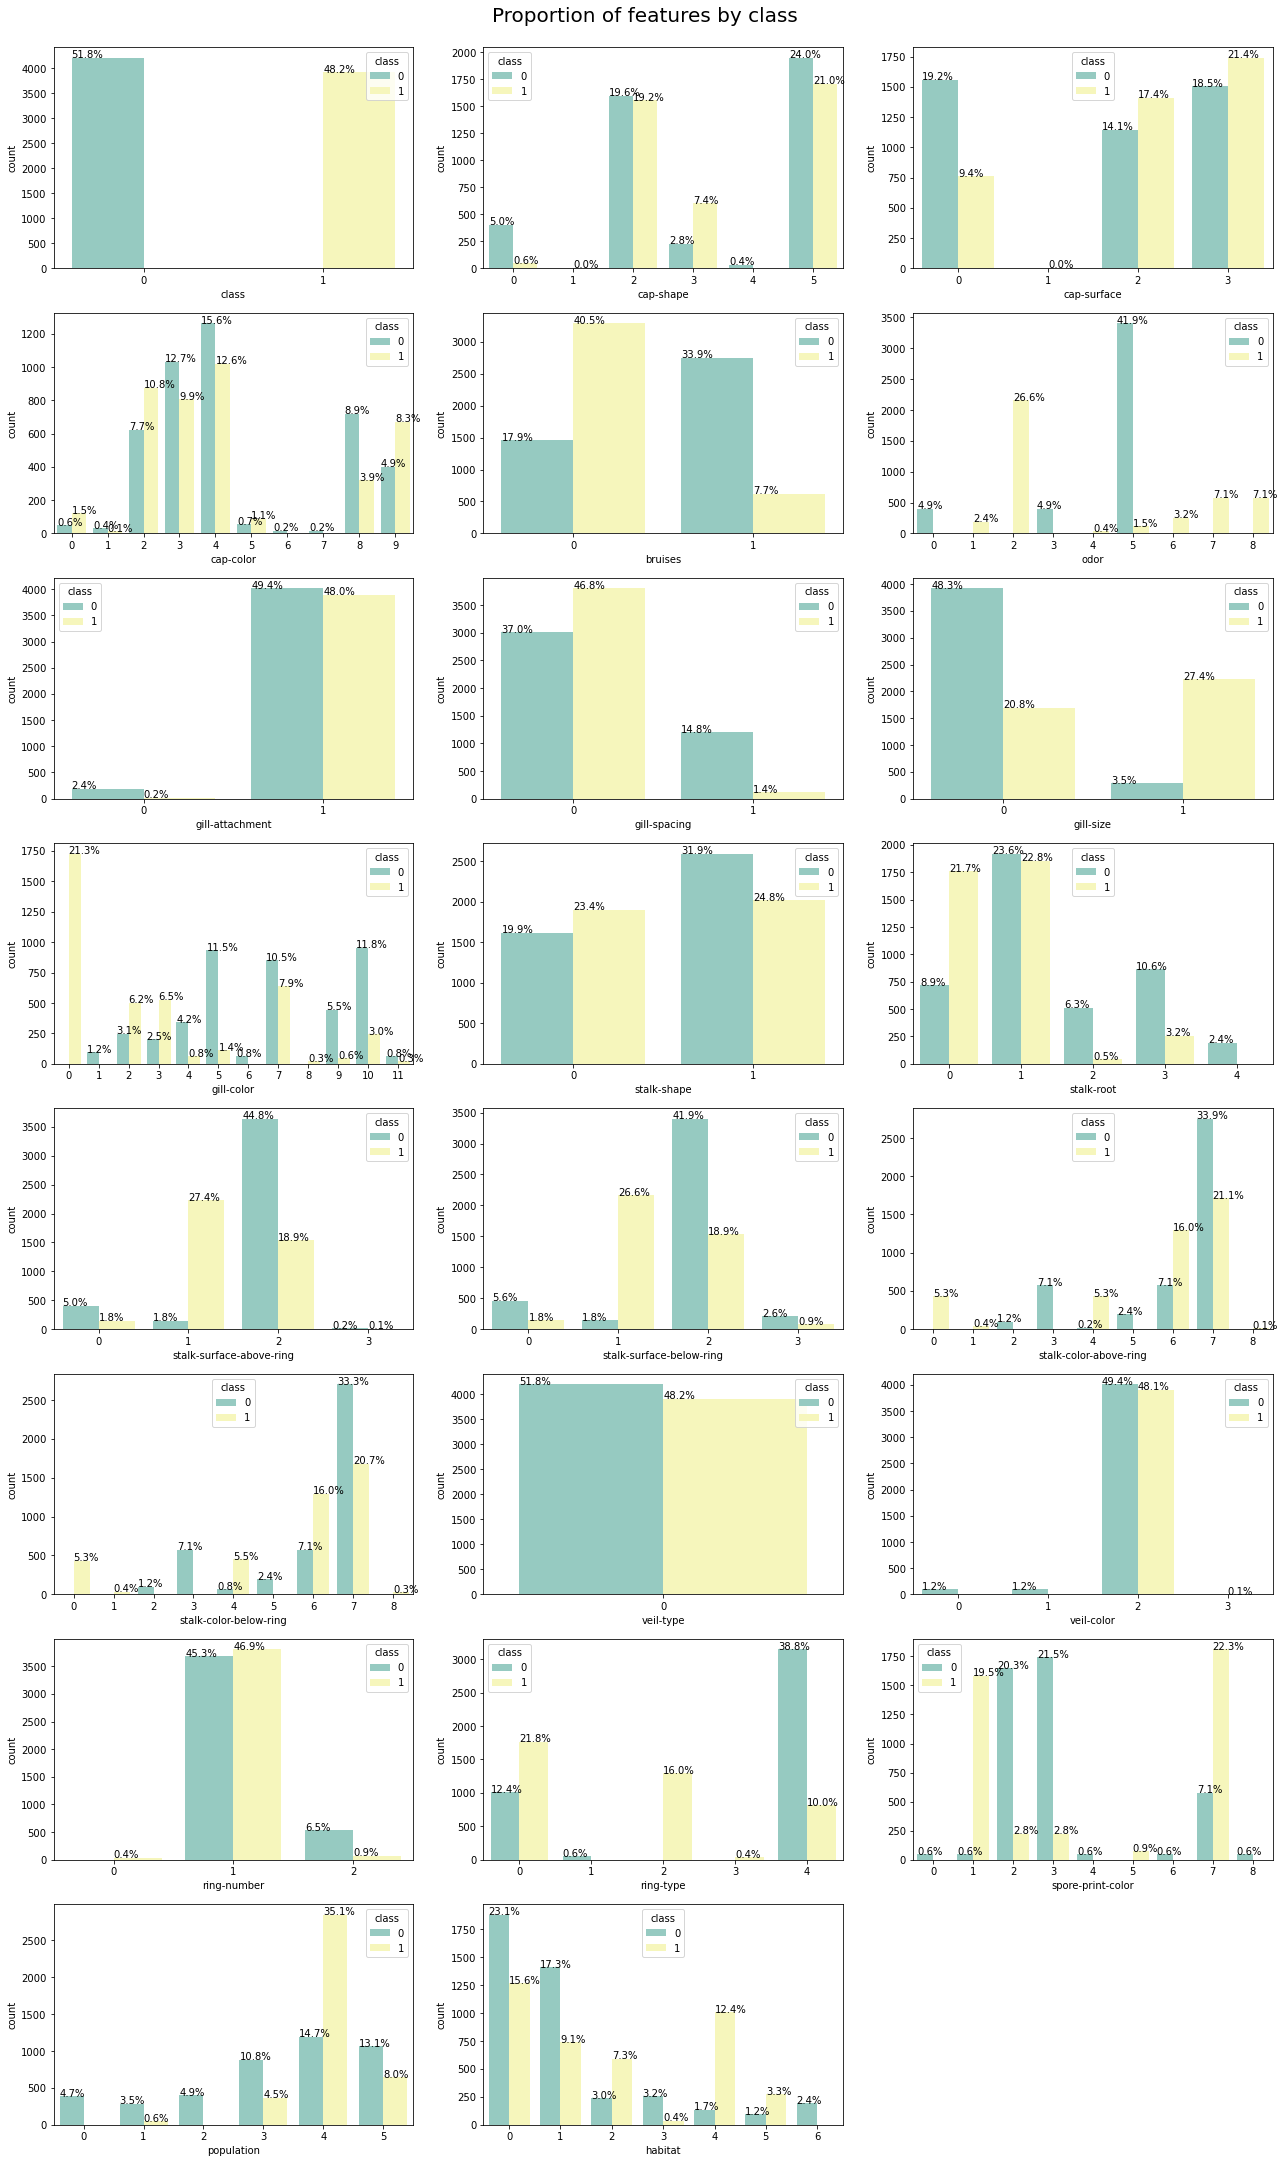

In [14]:
plt.figure(figsize=(18,30))
plt.suptitle("Proportion of features by class",fontsize=20,y=+1)
for i, j in enumerate(col):
    plt.subplot(8,3, i+1)
    ax=sns.countplot(df[j],hue=df["class"],palette="Set3")
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_height()
        ax.annotate(percentage,(x, y))
plt.tight_layout()

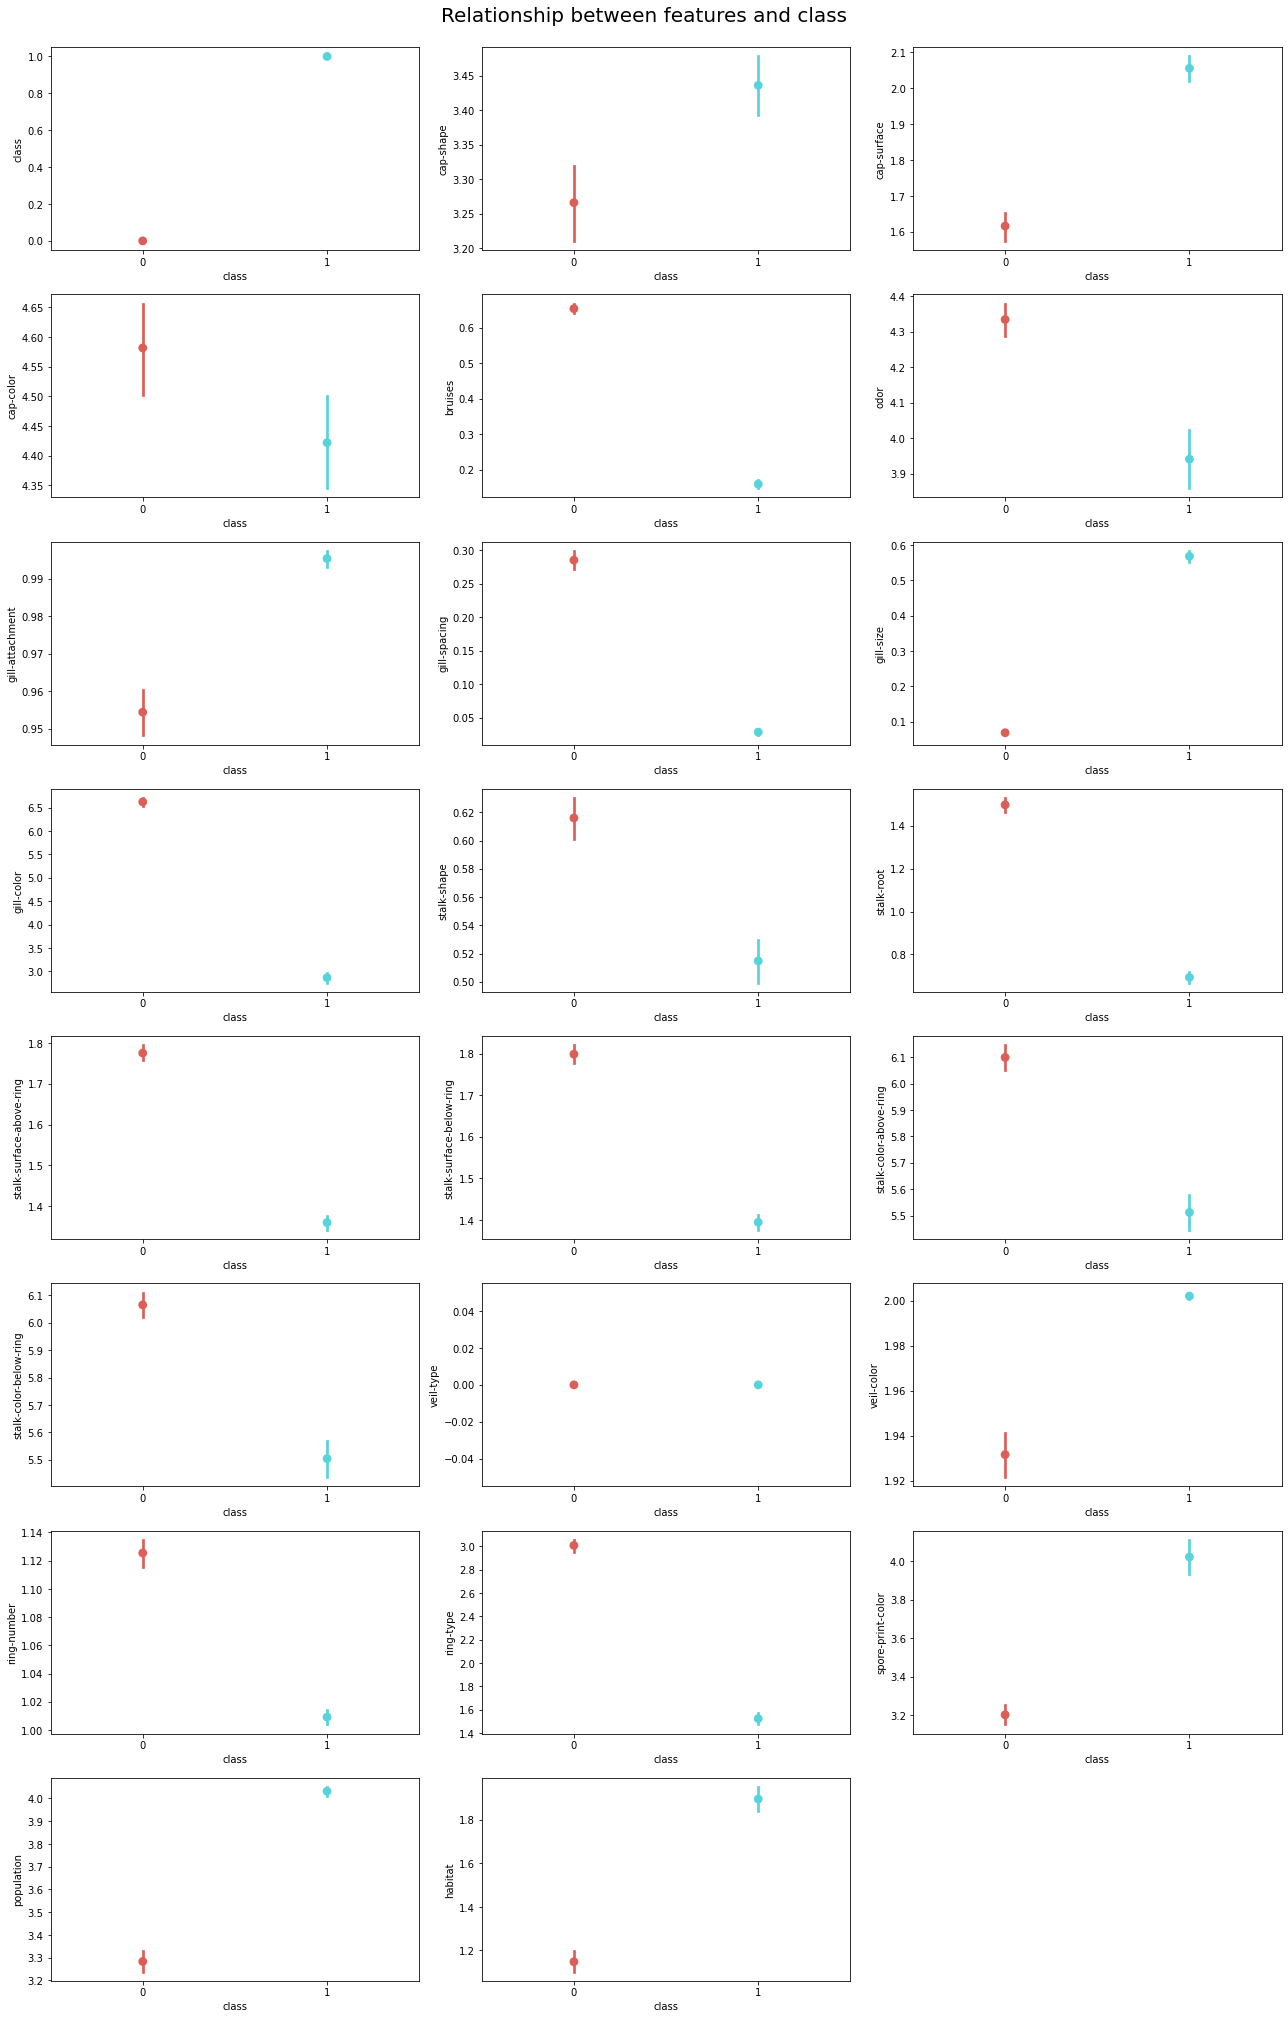

In [15]:
plt.figure(figsize=(18,28))
plt.suptitle("Relationship between features and class",fontsize=20,y=1)
for i, j in enumerate(col):
    plt.subplot(8,3, i+1)
    sns.pointplot(y=df[j],x=df["class"],palette="hls")
plt.tight_layout()

### Feature Reduction

In [16]:
df.drop(["veil-type"], axis=1, inplace=True)

### Standard scaling

In [17]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

### Spliting to training data and test data

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Logistic Regression

In [21]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred=lg.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.96      0.95      0.95       843
   Poisonous       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



<AxesSubplot:>

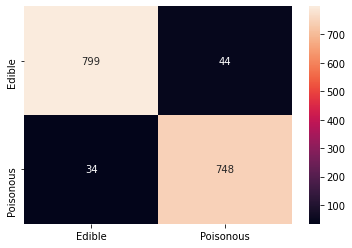

In [24]:
cm_LG=confusion_matrix(y_test,y_pred)
cm_df_LG = pd.DataFrame(cm_LG, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_LG, annot=True, fmt="d")

 ### Naive Bayes

In [25]:
nb_cls = GaussianNB()  
nb_cls.fit(x_train, y_train) 

GaussianNB()

In [26]:
y_pred=nb_cls.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.93      0.91      0.92       843
   Poisonous       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



<AxesSubplot:>

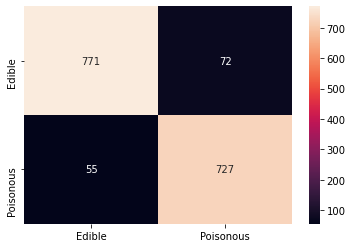

In [28]:
cm_GNB=confusion_matrix(y_test,y_pred)
cm_df_GNB = pd.DataFrame(cm_GNB, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_GNB, annot=True, fmt="d")

### Decision Tree

In [29]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=dtc.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<AxesSubplot:>

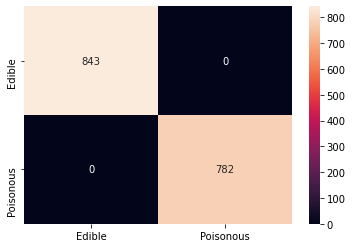

In [32]:
cm_DTC=confusion_matrix(y_test,y_pred)
cm_df_DTC = pd.DataFrame(cm_DTC, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_DTC, annot=True, fmt="d")

### Random Forest

In [33]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=rc.predict(x_test)

In [35]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<AxesSubplot:>

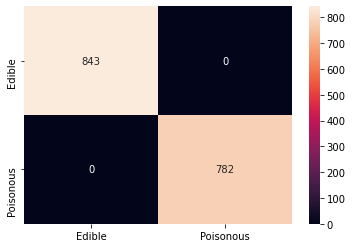

In [36]:
cm_RFC=confusion_matrix(y_test,y_pred)
cm_df_RFC = pd.DataFrame(cm_RFC, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_RFC, annot=True, fmt="d")

### SVC

In [37]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [38]:
y_pred=sv.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<AxesSubplot:>

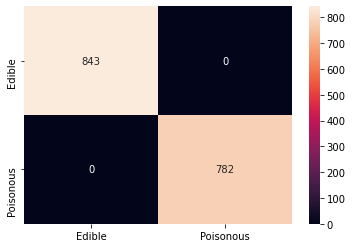

In [40]:
cm_SVC=confusion_matrix(y_test,y_pred)
cm_df_SVC = pd.DataFrame(cm_SVC, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_SVC, annot=True, fmt="d")

### KNN

In [41]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred=knn.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<AxesSubplot:>

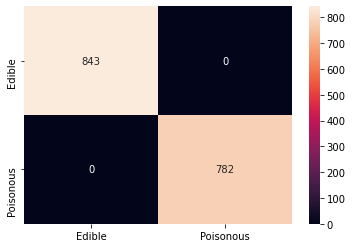

In [44]:
cm_KNN=confusion_matrix(y_test,y_pred)
cm_df_KNN = pd.DataFrame(cm_KNN, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_df_KNN, annot=True, fmt="d")

### Conclusion

Most models have 100 % accuracy in this dataset.